# Laboratorio 6
* ***JUAN SEBASTIAN GARAVITO GALLO***
* ***VICTOR MANUEL ARBELAEZ RAMIREZ***

In [386]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import scipy as sp


In [387]:
from sklearn.datasets import fetch_california_housing

## 1. Descargar una base de datos para regresión y visualizarla (por ejemplo buscar en https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In [388]:
dataframe = pd.read_csv("owid-covid-data.csv")



In [389]:
dataframe


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395808,ZWE,Africa,Zimbabwe,2024-04-17,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
395809,ZWE,Africa,Zimbabwe,2024-04-18,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
395810,ZWE,Africa,Zimbabwe,2024-04-19,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
395811,ZWE,Africa,Zimbabwe,2024-04-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [390]:
#Funcion para normalizar
def normalize_min_max(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

#Funcion para estandarizar
def estandarizar(datos):
    media = np.mean(datos)
    sigma = np.std(datos)
    datos_estandarizados = (datos - media) / sigma
    return datos_estandarizados

In [391]:
posDataDenmark = dataframe['location'].str.contains('Denmark')
dataCovidDenmark = dataframe[posDataDenmark]
dataCovidDenmark[:10]

fecha = dataCovidDenmark['date']
N = np.shape(np.ravel(fecha))
N = N[0]
x = np.linspace(0,N,N)
X = np.nan_to_num(x)

new_deaths = dataCovidDenmark['total_deaths']
new_deaths_N = normalize_min_max(new_deaths)
Datos = np.nan_to_num(new_deaths_N, nan=0.0)




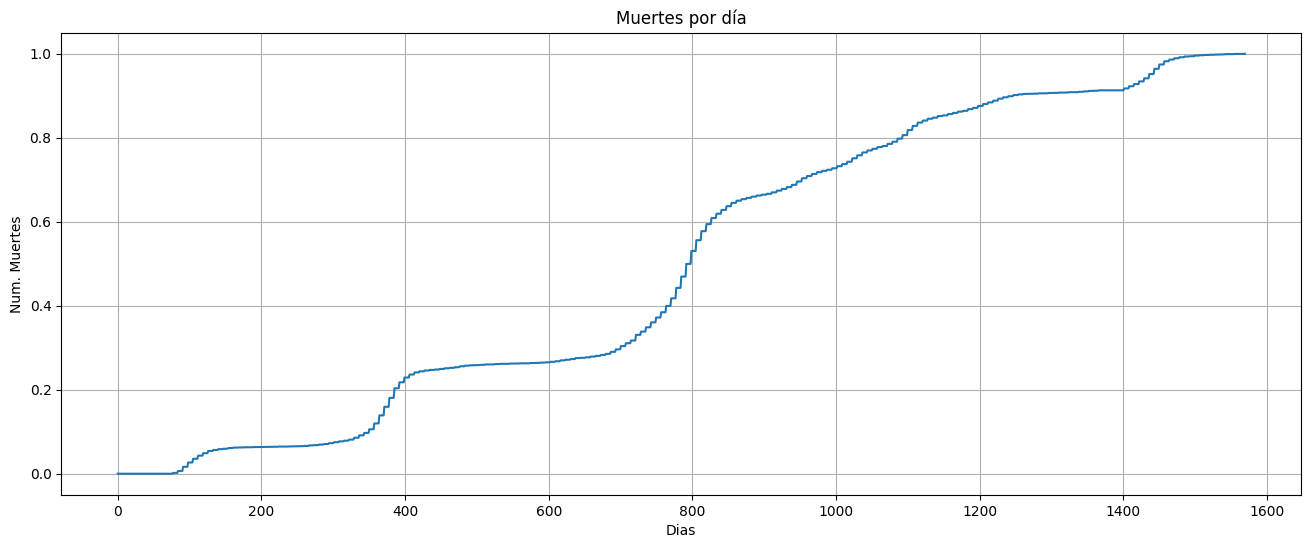

1569
1569


In [392]:
plt.figure(figsize=(16,6))
plt.plot(X,Datos)
plt.xlabel('Dias')
plt.ylabel('Num. Muertes')
plt.title('Muertes por día')
#plt.xlim([0,200])
plt.grid()
plt.show()
#dataCovidCHINA[:10]
#print(new_deaths.max())
print(len(x))
print(len(new_deaths_N))

In [393]:


# df_normalized es ahora un array NumPy con los datos normalizados
# Puedes convertirlo de nuevo a un DataFrame si lo necesitas
df_normalized = dataCovidDenmark

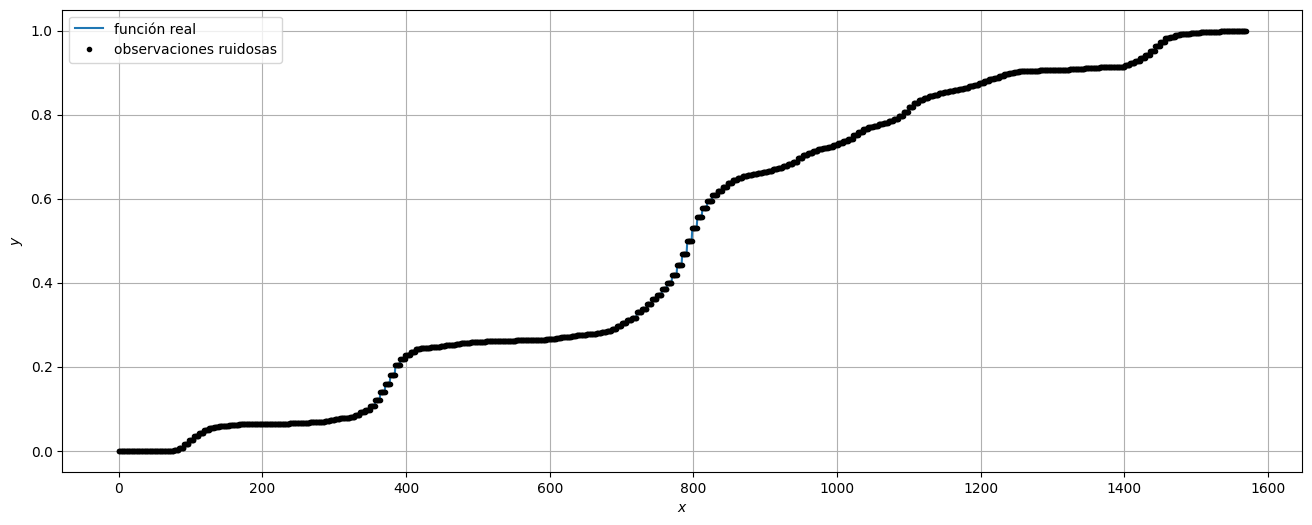

In [394]:
Datos = np.array(Datos)
X = np.array(X)

# Visualización de los datos originales y transformados
plt.figure(figsize=(16,6))
plt.plot(X, Datos, label='función real')
plt.plot(X, Datos, '.k', label='observaciones ruidosas')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

## 2. Dividir la base de datos en 70% para entrenamiento y 30% para test, utilizando primero una partición aleatoria, y luego una partición secuencial. Graficar ambos tipos de particiones.

In [395]:

# Dividir el conjunto de datos en entrenamiento y prueba aleatoriamente
X = X
y = Datos

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.3, random_state=42)


In [396]:
# Dividir el conjunto de datos en entrenamiento y prueba secuencialmente
n_train = int(0.7 * len(X))

X_train_seq = X[:n_train]
X_test_seq = X[n_train:]

y_train_seq = y[:n_train]
y_test_seq = y[n_train:]


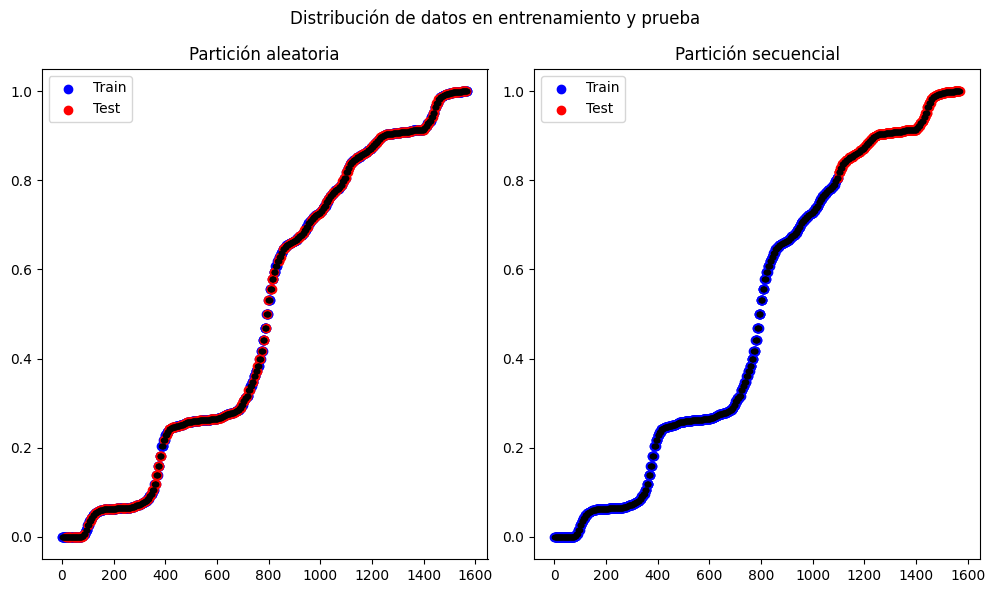

In [397]:
# Visualizar la distribución de los datos en entrenamiento y prueba para la partición aleatoria
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_random, y_train_random, color='blue', label='Train')
plt.scatter(X_test_random, y_test_random, color='red', label='Test')
plt.plot(X, Datos, '.k')
plt.title('Partición aleatoria')
plt.legend()

# Visualizar la distribución de los datos en entrenamiento y prueba para la partición secuencial
plt.subplot(1, 2, 2)
plt.scatter(X_train_seq, y_train_seq, color='blue', label='Train')
plt.scatter(X_test_seq, y_test_seq, color='red', label='Test')
plt.plot(X, Datos, '.k')
plt.title('Partición secuencial')
plt.legend()

plt.suptitle('Distribución de datos en entrenamiento y prueba')
plt.tight_layout()
plt.show()


 ## 3. Seleccione dos funciones base ya implementadas (por ejemplo: polinomial, exponencial, y coseno), y además implemente un nuevo tipo de función base que usted eliga, de manera que pueda definir tres modelos diferentes de regresión lineal.

In [398]:
def poli_carac(X, K):
    # Extraer caracteristicas polinomiales
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.zeros((N, K+1))

    # Calcular matriz Phi
    for k in range(K+1):
        Phi[:,k] = X**k
    return Phi

def plot_caracteristicas(X, Phi, K):
    legend = []
    for i in range(K+1):
        plt.plot(X, Phi[:, i])
        legend.append(r'$\phi_' + str(i) +'$(x)')
        plt.legend(legend);
        #plt.ylim([-1.5, 1.5])
        #plt.xlim([0, 1500])
        plt.grid(True)

def expo_carac(X, K):
    # Extraer caracteristicas exponenciales
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,len(X),K)
    sig2 = 2000

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(mu[k-1] - X)**2/sig2)
    return Phi

def cos_carac(X, K):
    # Extraer caracteristicas sinusoidales
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 1/len(X)
    F = F0 * np.linspace(1, K, K)
    #print(1./F)

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X)
    return Phi

def sigmo_carac(X, K): # FUNCIÓN BASE SIGMOIDE

    X = X.flatten()
    N = X.shape[0]
    s = 100
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,len(X),K)
    # Calcular matriz Phi
    for k in range(1,K+1):
      a=((X - mu[k-1])/np.sqrt(s))
      Phi[:,k] = 1/(1 + np.exp(-a))
    return Phi

In [399]:
K1 = 3
K2 = 10
K3 = 5
K4 = 5
Phi_cos = cos_carac(x, K1)
Phi_expo = expo_carac(x, K2)
Phi_sigmo = sigmo_carac(x, K3)
Phi_poli = poli_carac(x,K4)

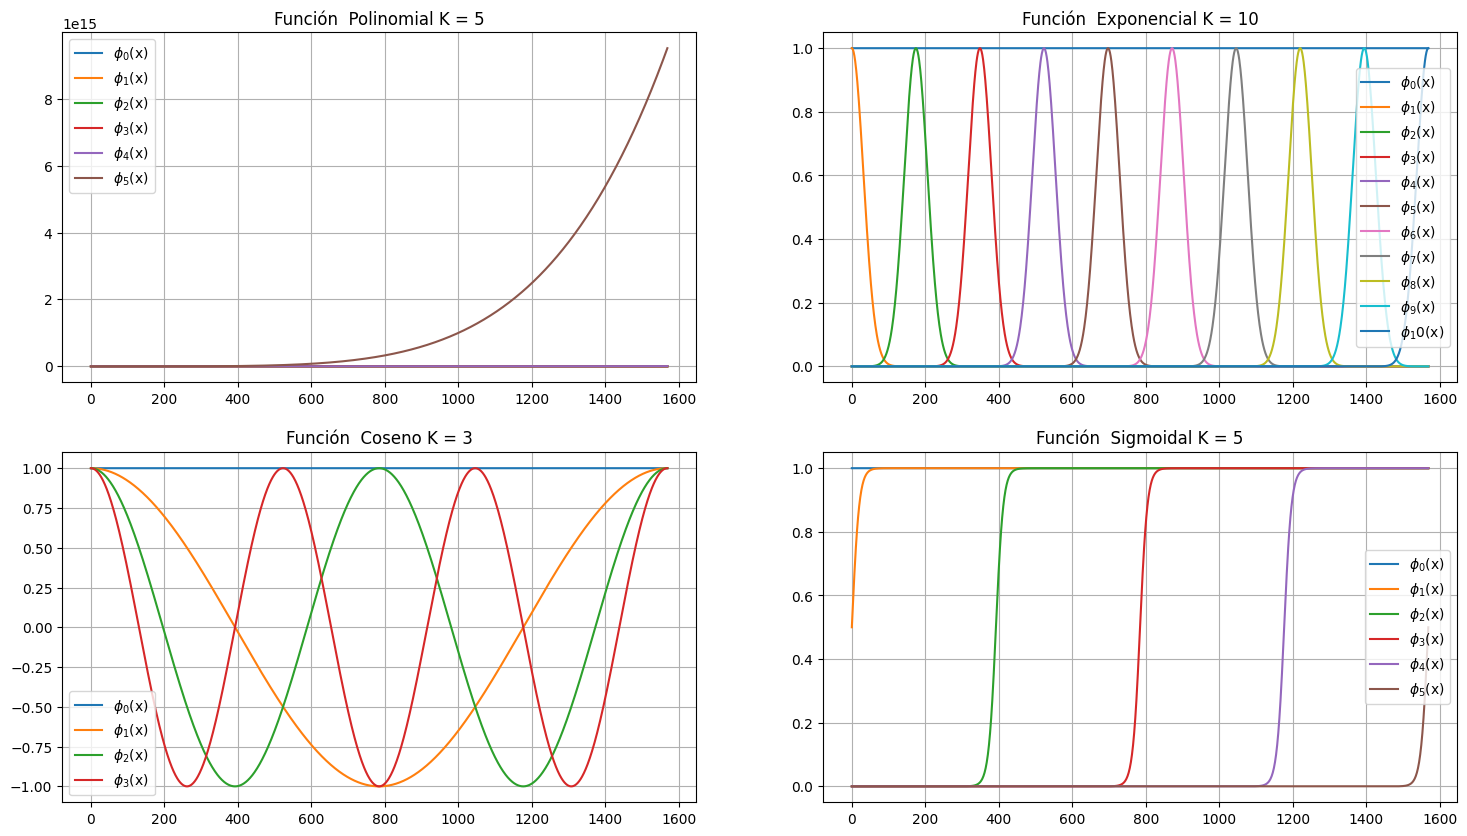

In [400]:

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plot_caracteristicas(x, Phi_poli, K4)
plt.title('Función  Polinomial K = ' + str(K4));
#plt.plot(X, y, '.k')

plt.subplot(2,2,2)
plot_caracteristicas(x, Phi_expo, K2)
plt.title('Función  Exponencial K = ' + str(K2));
#plt.xlim([0, 500])
#plt.plot(X, y, '.k')

plt.subplot(2,2,3)
plot_caracteristicas(x, Phi_cos, K1)
plt.title('Función  Coseno K = ' + str(K1));
#plt.xlim([0, 2500])
#plt.plot(X, Datos, '.k')

plt.subplot(2,2,4)
plot_caracteristicas(x, Phi_sigmo, K3)
plt.title('Función  Sigmoidal K = ' + str(K3));
#plt.xlim([0, 200])
#plt.plot(X, Datos, '.k')

plt.show()


In [401]:
#Funciones

def inferencia_max_vero_carac(Phi, y):
    # máxima verosimilitud usando caracteristicas
    # Phi: N x D, caracteristicas
    # y: N x 1, datos de salida observados
    # return: D x 1, vector de parametros estimados

    kappa = 1e-09 # jitter
    D = Phi.shape[1]

    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
    C = sp.linalg.cho_factor(PP)
    theta_ml = sp.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y
    return theta_ml
def plot_prediccion(X, prediccion):
    # Gráfica predicción

    plt.plot(X_train_random, y_train_random, '.k')
    plt.plot(X, Datos, lw=2)
    plt.plot(X, prediccion, '--', lw=2)
    plt.legend(['datos entrenamiento', 'función real', 'predicción'])

In [402]:
#Funcion para sacar todas las verosimilitudes
def max_vero(funcion,Xtrain,ytrain,tipo):
  plt.figure(figsize=(18,5))

  if funcion == poli_carac:
    K=[8,10,11]
  else:
    K=[10,50,200]

  for i in range(3):
    Phi_poli = funcion(Xtrain, K[i]) # características datos entrenamiento
    # inferencia usando max vero
    theta_ml_poli = inferencia_max_vero_carac(Phi_poli, ytrain)
    # predicción sobre todos los datos
    Phi_test_poli = funcion(X, K[i]) # características todos los datos
    y_pred_poli = Phi_test_poli @ theta_ml_poli # predicción


    plt.subplot(1,3,i+1)
    plot_prediccion(X, y_pred_poli)
    plt.title('Predicción ' + tipo + ' K = ' + str(K[i]))
    plt.grid()

**Gráfica - Partición aleatoria**

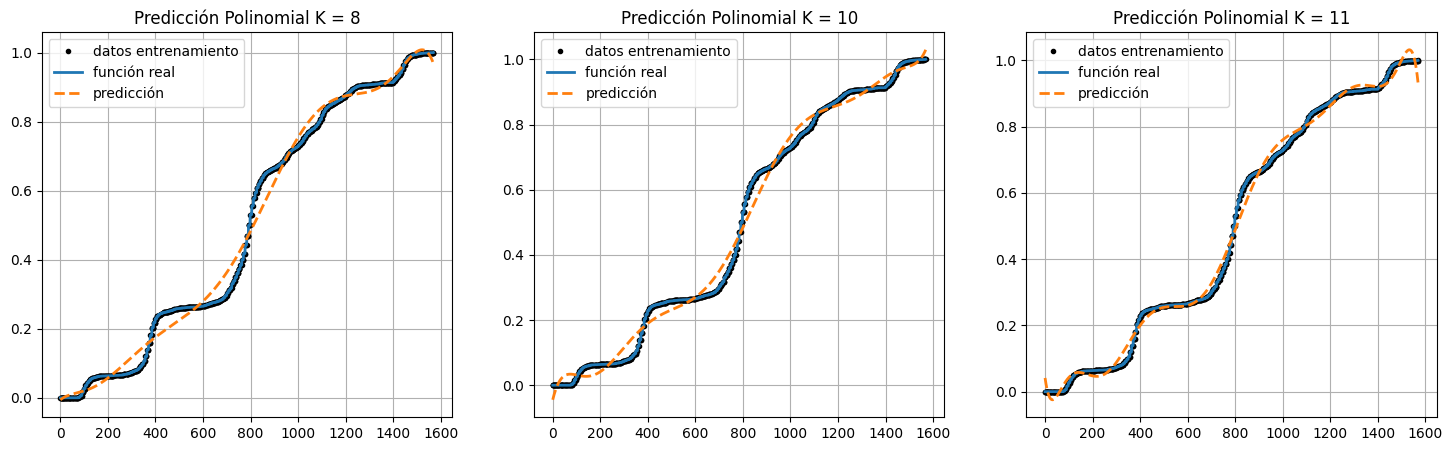

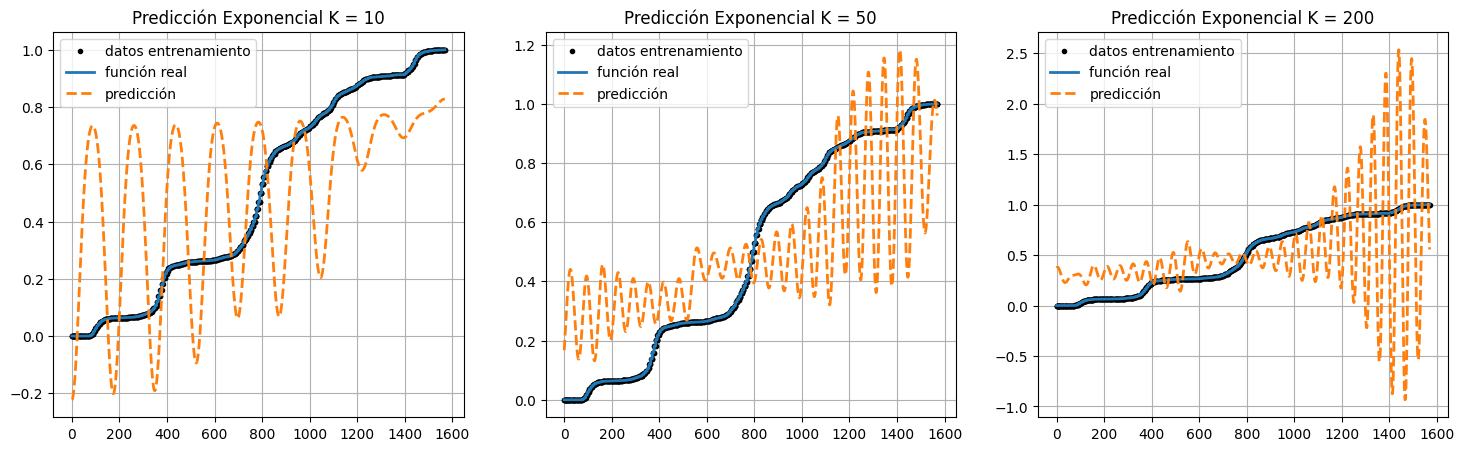

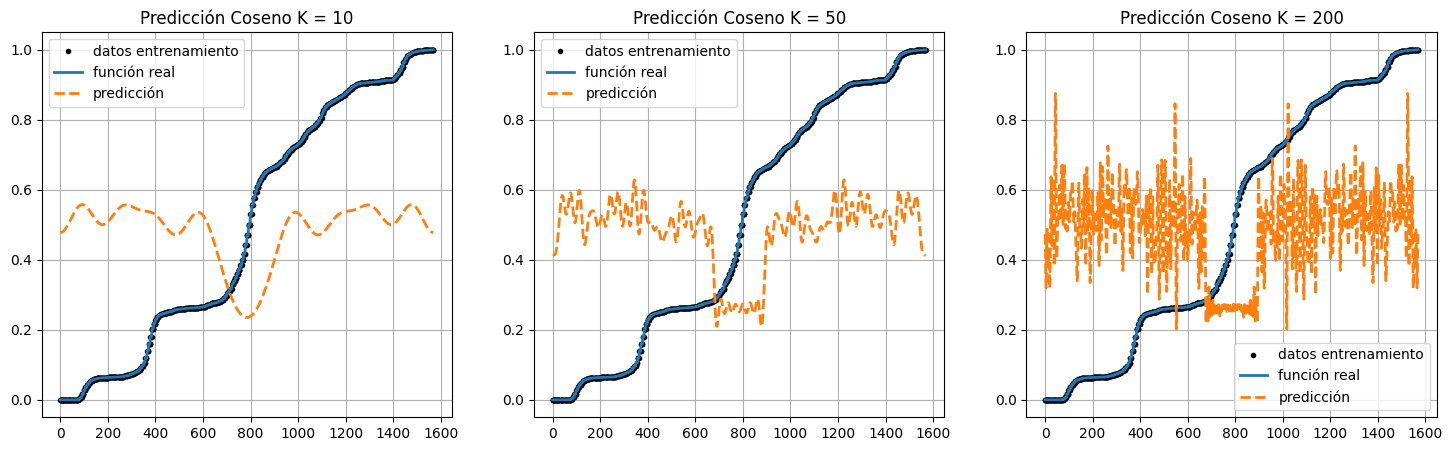

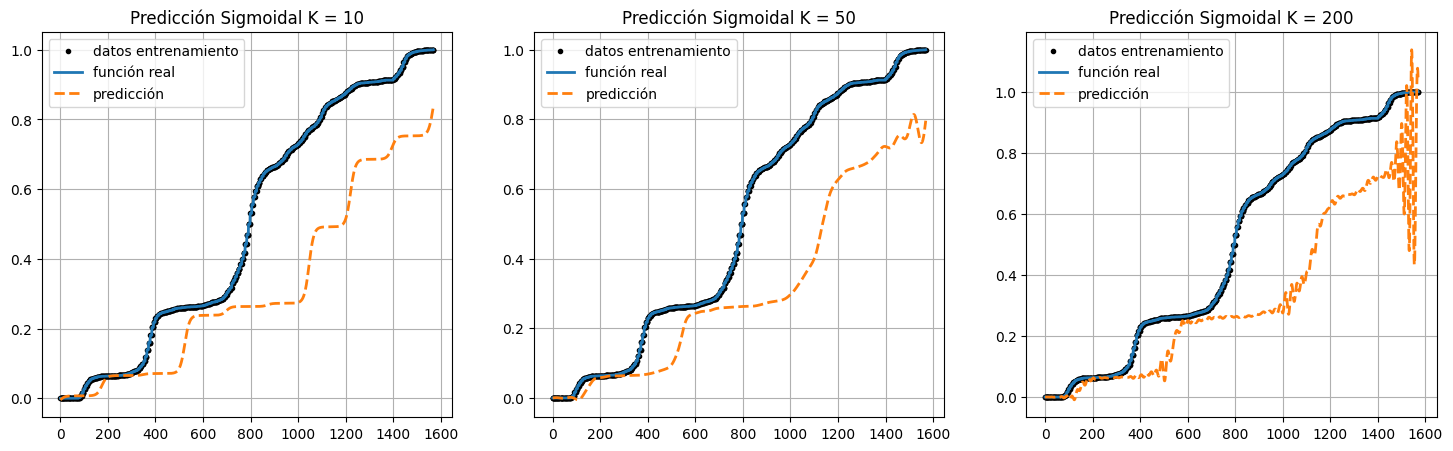

In [403]:
max_vero(poli_carac,X_train_random,y_train_random,'Polinomial')
max_vero(expo_carac,X_train_random,y_train_random,'Exponencial')
max_vero(cos_carac,X_train_random,y_train_random,'Coseno')
max_vero(sigmo_carac,X_train_random,y_train_random,'Sigmoidal')

La función polinomial sobresale como la opción más efectiva en este análisis para los datos aleatorios, mostrando la mejor capacidad para aproximar puntos distantes entre sí. Esto implica que puede capturar tendencias y patrones en los datos de manera mas precisa debido a la naturaleza de los datos ya que no presentan cambios demasiados abruptos. El mejor resultado se aprecia con el parametro k=11.

La función sigmoidal tambien muestra un buen comportamiento predictivo, ya que es eficiente tanto para datos con un comportamiento casi lineal o tambien para datos con cambios abruptos, lo que hace muy flexible para varias aplicaciones.

En contraste, tanto la función coseno como la exponencial muestran grandes deficiencias en la capacidad predictiva, ambas tienen dificultades para capturar los cambios en ciertos periodos de los datos para identificar ciertos valores, esto puede deberse a la naturaleza de los datos graficados y entrenados ya que no cuentan con alguna periodiciad apreciable.

**Gráfica - Partición secuencial**

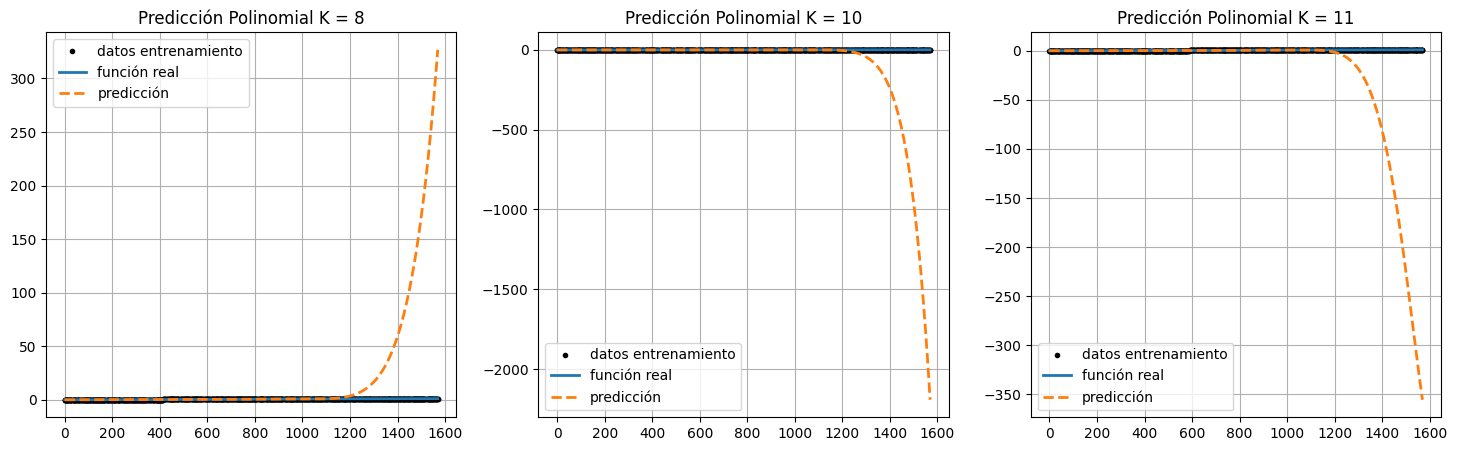

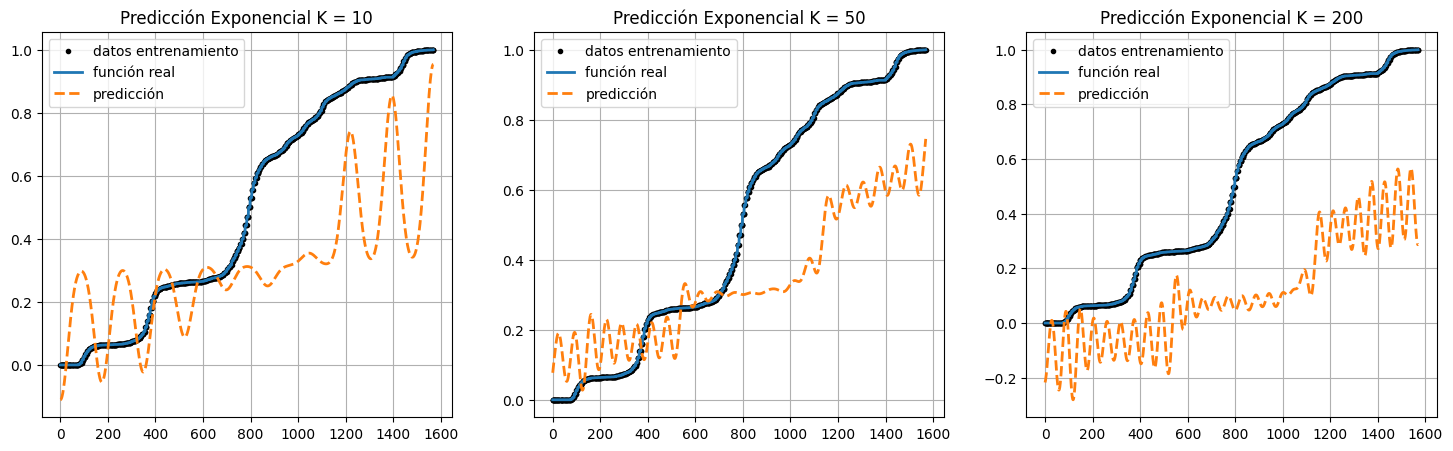

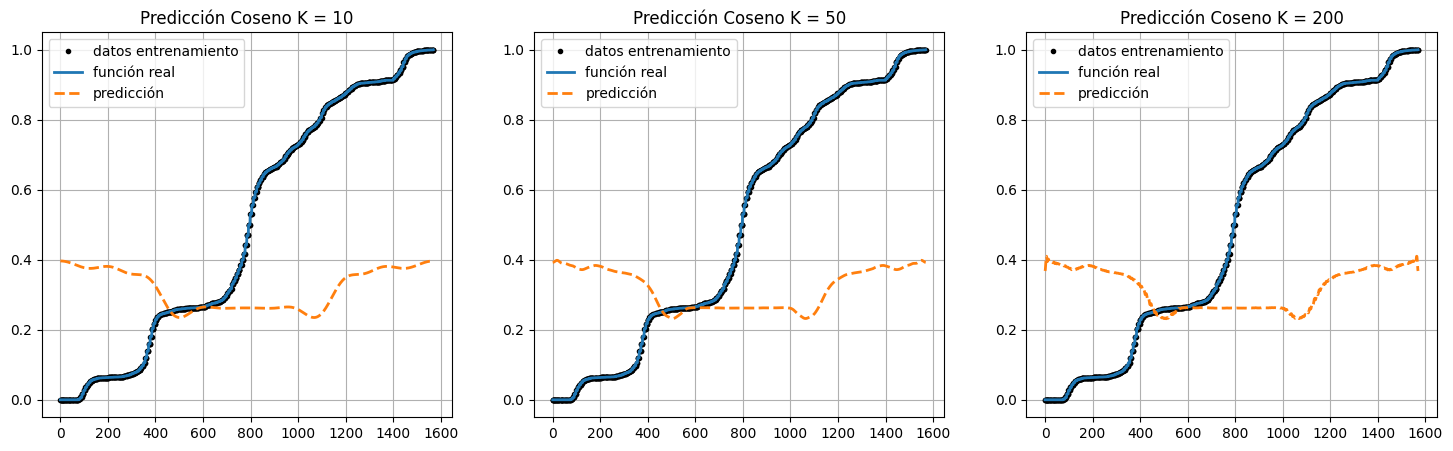

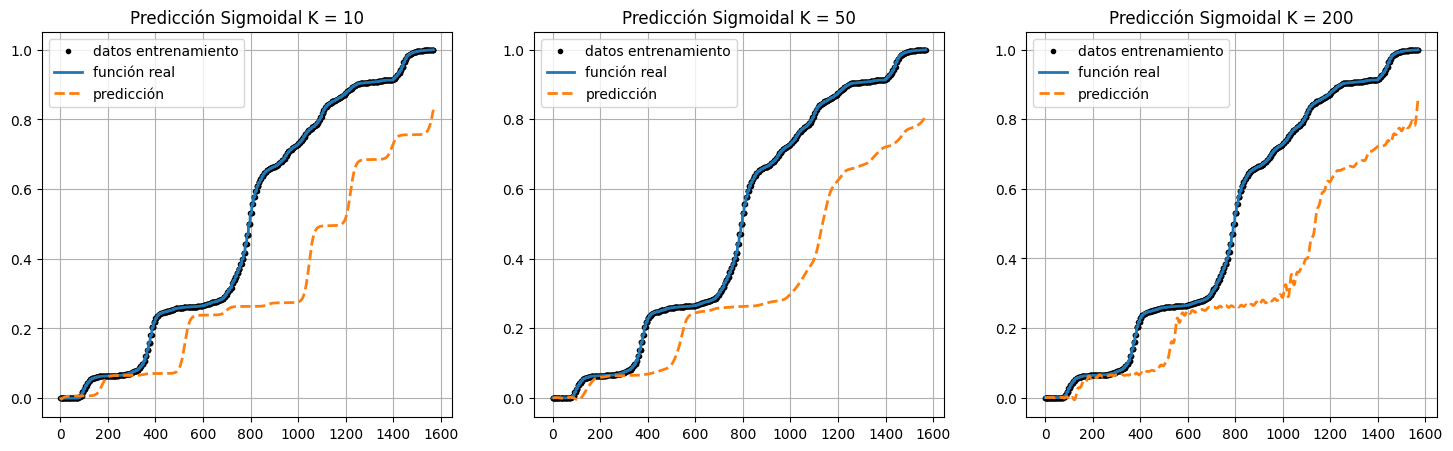

In [404]:
max_vero(poli_carac,X_train_seq,y_train_seq,'Polinomial')
max_vero(expo_carac,X_train_seq,y_train_seq,'Exponencial')
max_vero(cos_carac,X_train_seq,y_train_seq,'Coseno')
max_vero(sigmo_carac,X_train_seq,y_train_seq,'Sigmoidal')

Se puede observar que de manera general, estos modelos con los datos secuenciales presentan un peor comportamiento en comparación con los que se extrajeron aleatoriamente. Sin embargo la función sigmoidal sigue presentando un buen comportamiento debido a la flexibilidad para adaptarse a cambios lineales o abruptos, lo que le permite un buen desempeño, especialmente con un k=10.

En este contexto específico, es importante evaluar el efecto de utilizar únicamente los datos de las particiones secuenciales, sin incluir la porción de prueba que representa el 30% final del conjunto de datos. Esta omisión puede ocasionar una variación en el comportamiento de las funciones de regresión, ya que no consideran esa sección final de los datos. Al examinar este escenario, notamos que las funciones se adaptan de manera más precisa a los datos disponibles en este subconjunto. En el caso de la función polinomial, inicia con un comportamiento aceptable pero posteriormente el error aumenta significativamente en los ultimos datos. 

 6. Calcule el RMSE entre las predicciones de cada modelo `y_pred` y los datos de test `y_test`, así como el RMSE entre las predicciones de cada modelo `y_pred` y los datos de entrenamiento `y_train`. Grafique los errores (eje y) vs el número de caracteristicas (eje x). En base a estas gráficas establezca:

In [405]:
def rmse(y, y_pred):
    # Calculo función de error
    y = y.flatten()
    y_pred = y_pred.flatten()
    N = y.shape[0]
    difer = (y - y_pred)**2
    return np.sqrt((1.0/N) * np.sum(difer))

In [406]:
def rmse_k(carac,K_max,titulo,Xtrain,ytrain,Xtest,ytest):

  rmse_train = []
  rmse_test = []
  K_vector = []
  #carac = expo_carac # seleccionar tipo de caracteristicas (trigo, expo, sigmo)

  if K_max <= 10:
    cons=1
  else:
    cons=10

  for i in range(1, K_max,cons):
    K = i

    Phi_train = carac(Xtrain, K)
    theta_ml = inferencia_max_vero_carac(Phi_train, ytrain)

    y_pred = Phi_train @ theta_ml # predicción
    rmse_train.append(rmse(ytrain, y_pred)) # medir error

    # predicción sobre datos de test
    Phi_test = carac(Xtest, K)
    y_pred = Phi_test @ theta_ml # predicción
    rmse_test.append(rmse(ytest, y_pred)) # medir error

    K_vector.append(i)

  plt.figure(figsize=(15,4))
  plt.plot(K_vector, rmse_train, '-', label='Error train')
  plt.plot(K_vector, rmse_test, '-', label='Error test')
  plt.xticks(K_vector);
  plt.ylabel('RMSE')
  plt.xlabel('K')
  plt.title(titulo)
  plt.legend()

** RMSE - Partición aleatoria

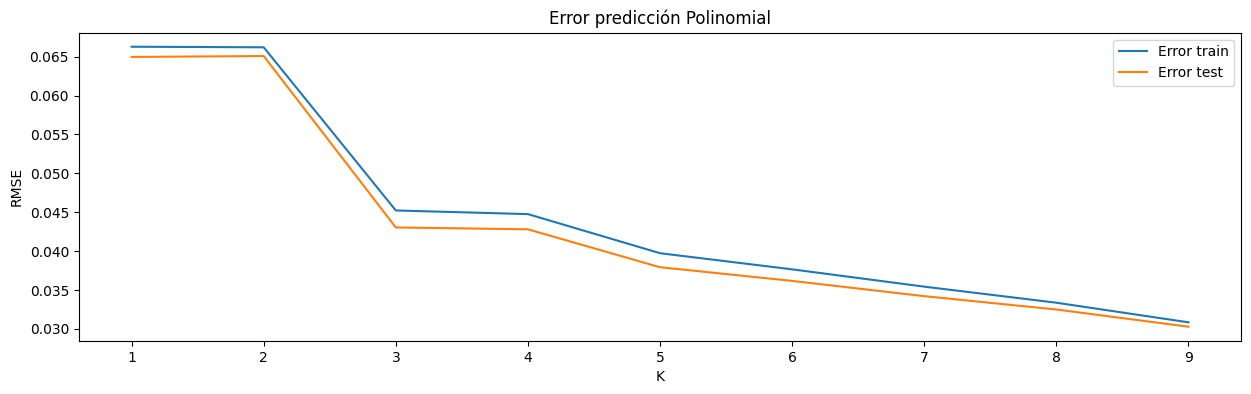

In [407]:
rmse_k(poli_carac,10,'Error predicción Polinomial',X_train_random,y_train_random,X_test_random,y_test_random)

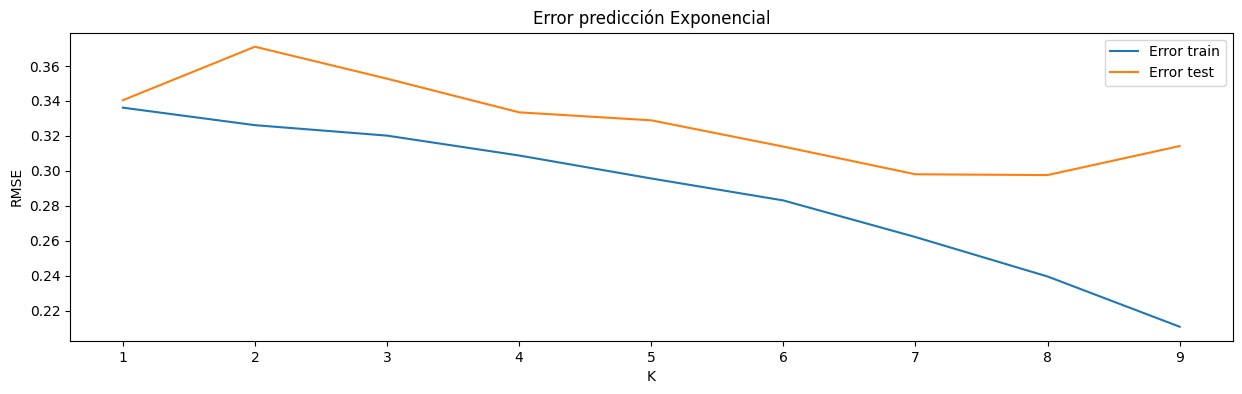

In [408]:
rmse_k(expo_carac,10,'Error predicción Exponencial',X_train_random,y_train_random,X_test_random,y_test_random)

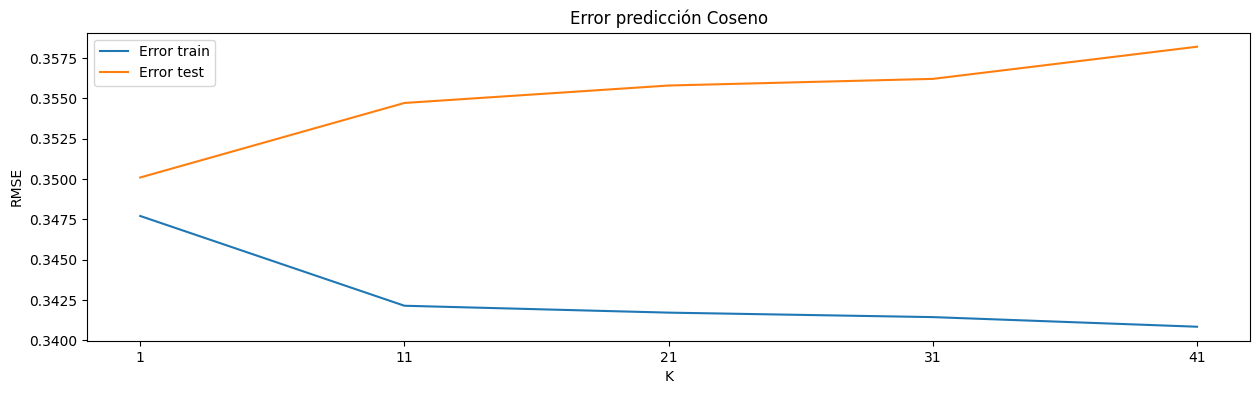

In [409]:
rmse_k(cos_carac,50,'Error predicción Coseno',X_train_random,y_train_random,X_test_random,y_test_random)

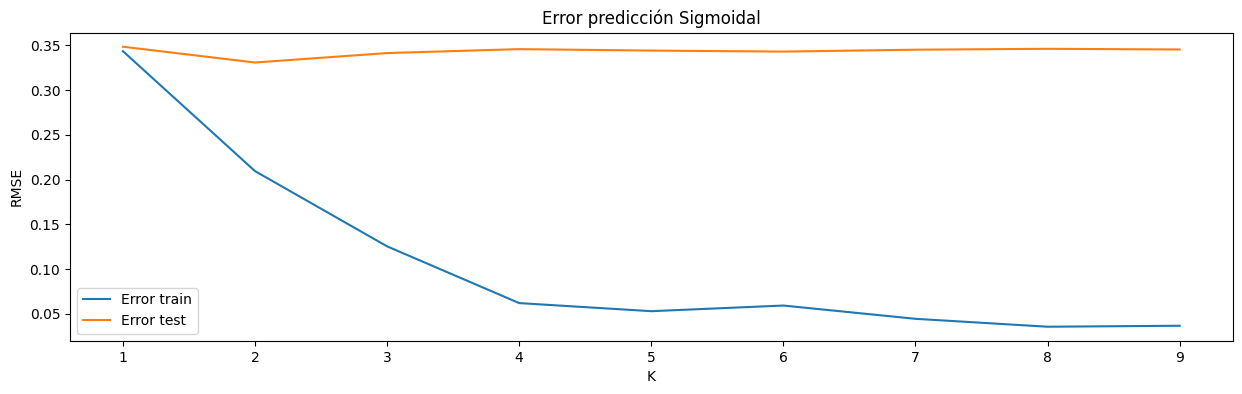

In [410]:
rmse_k(sigmo_carac,10,'Error predicción Sigmoidal',X_train_random,y_train_random,X_test_random,y_test_random)

**RMSE - Partición secuencial**

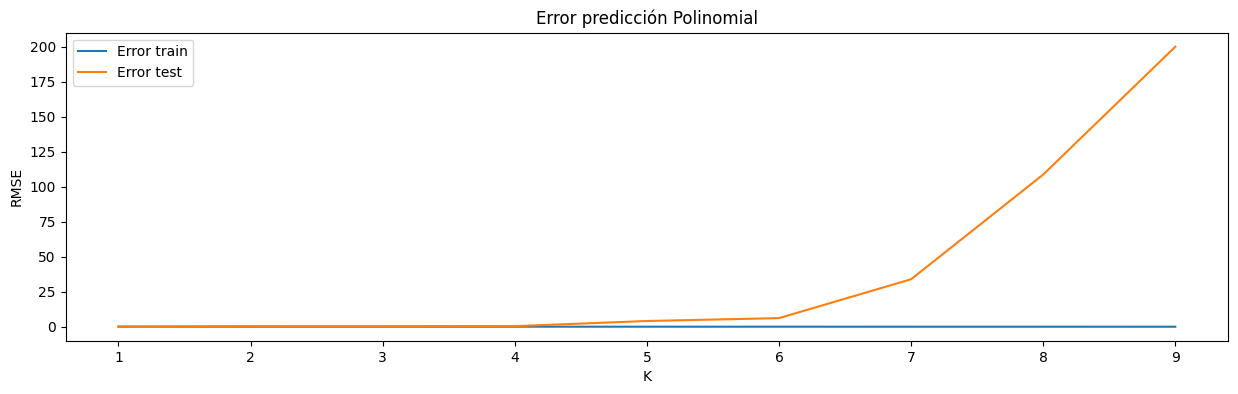

In [411]:
rmse_k(poli_carac,10,'Error predicción Polinomial',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

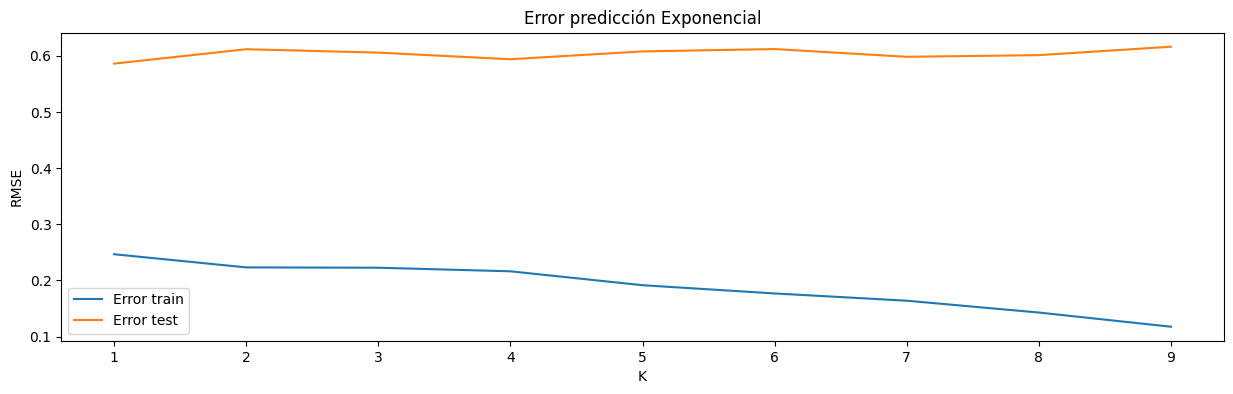

In [412]:
rmse_k(expo_carac,10,'Error predicción Exponencial',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

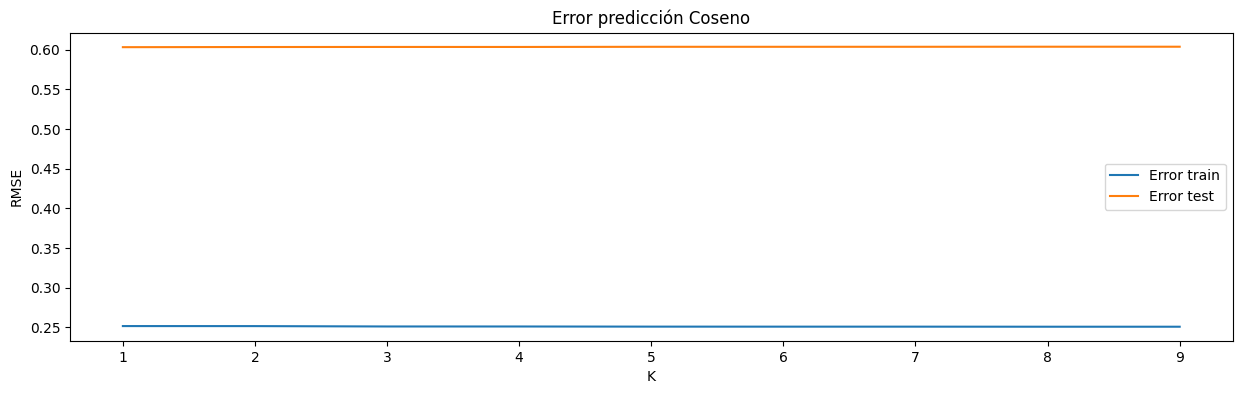

In [413]:
rmse_k(cos_carac,10,'Error predicción Coseno',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

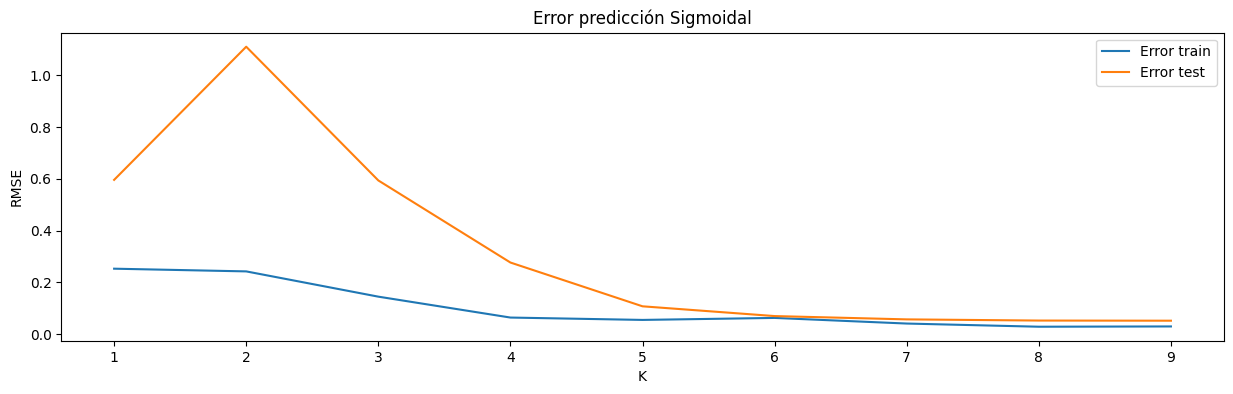

In [414]:
rmse_k(sigmo_carac,10,'Error predicción Sigmoidal',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

# Conclusiones


- La función polinomial se destaca como la opción más efectiva para los datos aleatorios, mostrando una capacidad notable para aproximar puntos distantes entre sí y capturar tendencias y patrones en los datos de manera precisa. Sin embargo, su desempeño disminuye en los datos secuenciales, especialmente en los últimos puntos, lo que sugiere que puede no ser la mejor opción.

- La función sigmoidal muestra un buen comportamiento predictivo tanto para datos con comportamiento casi lineal como para aquellos con cambios abruptos, lo que la hace flexible y adecuada para diversas aplicaciones. Conserva un buen desempeño incluso en datos secuenciales, lo que la convierte en una opción robusta.

- Tanto la función coseno como la exponencial muestran deficiencias en la capacidad predictiva, especialmente en la identificación de cambios en ciertos períodos de los datos Esto puede deberse a la falta de periodicidad en los datos, lo que dificulta su capacidad para modelar adecuadamente el comportamiento de los datos.

- En general, los modelos con datos aleatorios presentan un mejor comportamiento que aquellos con datos secuenciales. Sin embargo, la función sigmoidal sigue mostrando un buen  incluso en datos secuenciales debido a su capacidad para adaptarse a cambios lineales o abruptos.

- El análisis previo revela que los modelos con una mayor capacidad de generalización en la partición aleatoria son la polinomial y el sigmoidal. Esto se debe a su comportamiento, que se limita a dar relevancia a los valores cercanos a la media o al centro, lo que resulta en una sólida capacidad de predicción en diferentes puntos o regiones de la señal.

- Por otro lado, en el caso de la partición secuencial, la función que muestra un mejor comportamiento continuan siendo la sigmoidal y la polinomial en algunas regiones. Esto puede relacionarse con la naturaleza creciente de la señal en esta partición.

Se resalta la importancia de contar con una variedad de funciones base y ser capaz de elegir la más adecuada según el contexto de trabajo. Al disponer de diferentes funciones base y probarlas con una base de datos, es posible mejorar significativamente los resultados de la regresión lineal, ya que cada función puede sobresalir en escenarios particulares.
